In [8]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math
from datetime import datetime
import cv2

In [9]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def doublethreshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

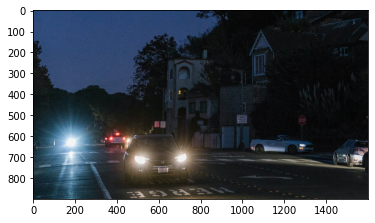

In [10]:
orig1 = cv2.imread("../Image/car_at_night_02.jpg")
orig1_rgb = cv2.cvtColor(orig1, cv2.COLOR_BGR2RGB)

plt.imshow(orig1_rgb)

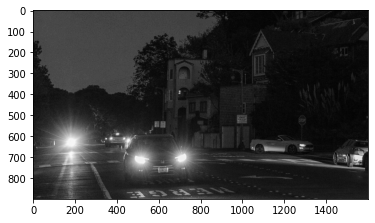

In [11]:
grayscale = cv2.cvtColor(orig1_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale, cmap='gray')

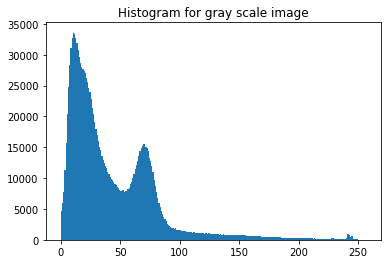

In [12]:
dst = cv2.calcHist(grayscale, [0], None, [256], [0,256])

plt.hist(grayscale.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

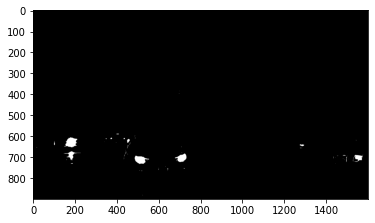

In [13]:
image = cv2.cvtColor(orig1_rgb, cv2.COLOR_RGB2HSV)
result = np.copy(orig1_rgb)

# lower boundary RED color range values; Hue (0-10)
lower3 = np.array([0, 0, 225])
upper3 = np.array([180, 31, 255])

white_mask = cv2.inRange(image, lower3, upper3)

plt.imshow(white_mask, cmap='gray')

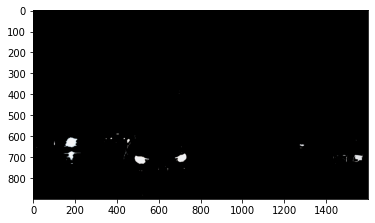

In [14]:
result1 = np.copy(orig1_rgb)
result1 = cv2.bitwise_and(result1, result1, mask=white_mask)
plt.imshow(result1)

In [19]:
# Apply Gaussian Filter
start_time = datetime.now()
mygraysmoothimg=applyGaussFilter(white_mask, mygauss)
end_time = datetime.now()
print('Duration - {}: {}'.format("ApplyGaussFilter", end_time - start_time))
# Calculate Gradients and Angles
start_time = datetime.now()
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateGradient", end_time - start_time))
# Calculate Non Max Suppression
start_time = datetime.now()
NMS_G = non_max_suppression(G, theta)
end_time = datetime.now()
print('Duration - {}: {}'.format("non_max_suppression", end_time - start_time))
# Calculate double threshold
start_time = datetime.now()
mythreshold, weak, strong = doublethreshold(NMS_G, 0.001, 0.1)
end_time = datetime.now()
print('Duration - {}: {}'.format("threshold", end_time - start_time))
# Calculate hysteresis
start_time = datetime.now()
myhysteresis = hysteresis(mythreshold, weak)
end_time = datetime.now()
print('Duration - {}: {}'.format("hysteresis", end_time - start_time))

Duration - ApplyGaussFilter: 0:05:13.735666
Duration - calculateGradient: 0:00:24.640964
Duration - non_max_suppression: 0:00:06.854408
Duration - threshold: 0:00:26.348070
Duration - hysteresis: 0:00:01.303276


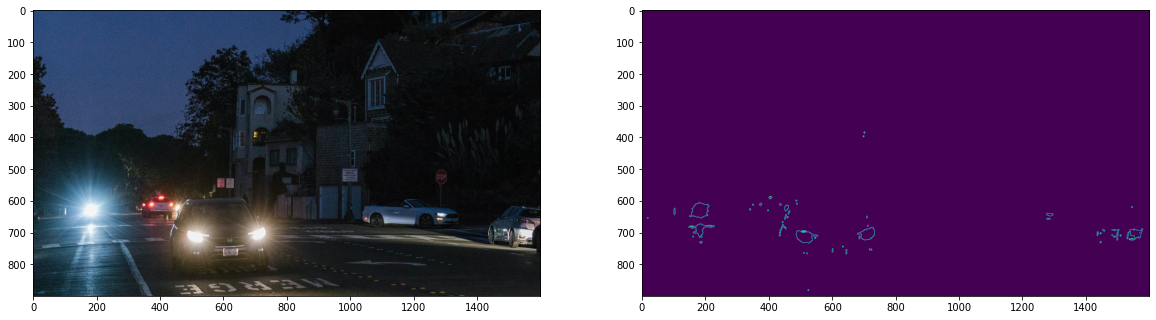

In [20]:
# Raw vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(orig1_rgb)
axarr[1].imshow(myhysteresis)

In [21]:
# Try to get the rectangle surrounding the objects
x, y = [], []
minx = []
maxx = []
miny = []
maxy = []

nR, nC = mygraysmoothimg.shape
max_obj_width = 100
max_obj_height = 50

print("nR: ", nR)
print("nC: ", nC)

for i in range(nR):
    for j in range(nC):
        if np.abs(myhysteresis[i,j]) > 200:
            x.append(j)
            y.append(i)
            
print("len(x): ", len(x))


tmpx = np.copy(x)
tmpy = np.copy(y)

count = 1

while len(tmpx)>0:
# for k in range(1):

    print("count: ", count)
    
    current_maxx = tmpx[0]
    current_maxy = tmpy[0]
    current_minx = tmpx[0]
    current_miny = tmpy[0]
    
    current_x = tmpx[0]
    current_y = tmpy[0]
    
    print("current_maxx: ", current_maxx)
    print("current_minx: ", current_minx)
    print("current_maxy: ", current_maxy)
    print("current_miny: ", current_miny)
    
    
    # get the maxx
    for j in range(int(max_obj_width/2)):
        isfound = 0
        for i in range(-int(max_obj_height/2),int(max_obj_height/2)):
            if myhysteresis[current_y + i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("j: ", j)
            current_maxx = current_maxx + j
            break
        elif isfound == 1 and j == int(max_obj_width/2) - 1:
            print("j: ", j)
            current_maxx = current_maxx + j
            
    
    # get the min x
    for j in range(int(max_obj_width/2)):
        isfound = 0
        for i in range(-int(max_obj_height/2),int(max_obj_height/2)):
            if myhysteresis[current_y + i, current_x - j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("j: ", j)
            current_minx = current_minx - j
            break
        elif isfound == 1 and j == int(max_obj_width/2) - 1:
            print("j: ", j)
            current_minx = current_minx - j
    
    
    # get the maxy
    for i in range(int(max_obj_height/2)):
        isfound = 0
        for j in range(-int(max_obj_width/2),int(max_obj_width/2)):
            if myhysteresis[current_y + i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("i: ", i)
            current_maxy = current_maxy + i
            break
        elif isfound == 1 and i == int(max_obj_height/2) - 1:
            print("i: ", i)
            current_maxy = current_maxy + i
            
    # get the miny
    for i in range(int(max_obj_height/2)):
        isfound = 0
        for j in range(-int(max_obj_width/2),int(max_obj_width/2)):
            if myhysteresis[current_y - i, current_x + j] > 200:
                isfound = 1
                break
        if isfound == 0:
            print("i: ", i)
            current_miny = current_miny - i
            break
        elif isfound == 1 and i == int(max_obj_height/2) - 1:
            print("i: ", i)
            current_miny = current_miny - i
    
    
    print("current_maxx: ", current_maxx)
    print("current_minx: ", current_minx)
    print("current_maxy: ", current_maxy)
    print("current_miny: ", current_miny)
    
    minx.append(current_minx)
    maxx.append(current_maxx)
    miny.append(current_miny)
    maxy.append(current_maxy)
    
    # Remove the current object
    newx = []
    newy = []
    
    for i in range(len(tmpx)):
        if tmpx[i] > current_maxx or tmpx[i] < current_minx or tmpy[i] > current_maxy or tmpy[i] < current_miny:
            newx.append(tmpx[i])
            newy.append(tmpy[i])
            
    tmpx = newx
    tmpy = newy
    
    print("new len: ", len(newx))
    count = count + 1


plt.imshow(myraw)
plt.autoscale(False)
plt.plot(x,y, 'ro')

nR:  900
nC:  1600
len(x):  2425
count:  1
current_maxx:  700
current_minx:  700
current_maxy:  382
current_miny:  382
j:  3
j:  5
i:  7
i:  1
current_maxx:  703
current_minx:  695
current_maxy:  389
current_miny:  381
new len:  2407
count:  2
current_maxx:  697
current_minx:  697
current_maxy:  395
current_miny:  395
j:  6
j:  2
i:  5
i:  1
current_maxx:  703
current_minx:  695
current_maxy:  400
current_miny:  394
new len:  2393
count:  3
current_maxx:  402
current_minx:  402
current_maxy:  586
current_miny:  586
j:  8
j:  4
i:  7
i:  1
current_maxx:  410
current_minx:  398
current_maxy:  593
current_miny:  585
new len:  2356
count:  4
current_maxx:  402
current_minx:  402
current_maxy:  594
current_miny:  594
j:  8
j:  4
i:  1
i:  1
current_maxx:  410
current_minx:  398
current_maxy:  595
current_miny:  593
new len:  2352
count:  5
current_maxx:  485
current_minx:  485
current_maxy:  597
current_miny:  597
j:  5
j:  2
i:  5
i:  1
current_maxx:  490
current_minx:  483
current_maxy:  

i:  19
current_maxx:  1510
current_minx:  1504
current_maxy:  724
current_miny:  687
new len:  453
count:  46
current_maxx:  690
current_minx:  690
current_maxy:  708
current_miny:  708
j:  43
j:  13
i:  16
i:  24
current_maxx:  733
current_minx:  677
current_maxy:  724
current_miny:  684
new len:  356
count:  47
current_maxx:  1527
current_minx:  1527
current_maxy:  713
current_miny:  713
j:  49
j:  1
i:  11
i:  24
current_maxx:  1576
current_minx:  1526
current_maxy:  724
current_miny:  689
new len:  240
count:  48
current_maxx:  1495
current_minx:  1495
current_maxy:  714
current_miny:  714
j:  8
j:  1
i:  10
i:  24
current_maxx:  1503
current_minx:  1494
current_maxy:  724
current_miny:  690
new len:  218
count:  49
current_maxx:  1486
current_minx:  1486
current_maxy:  715
current_miny:  715
j:  8
j:  8
i:  9
i:  24
current_maxx:  1494
current_minx:  1478
current_maxy:  724
current_miny:  691
new len:  216
count:  50
current_maxx:  1496
current_minx:  1496
current_maxy:  725
curre

IndexError: index 900 is out of bounds for axis 0 with size 900